# Prediction of back pain using Logistic Regression, Python

The data comprises of 13 columns and 310 observations. 12 columns are numerical attributes of the spine/ back. The last column is the Status of the patient - Abnormal indicates presence of Back pain and Normal indicates no back pain. The intent is to predict the Status based on the 12 variables. 

In [3]:
#Loading the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [4]:
back_data = pd.read_csv("Dataset_spine.csv")

In [5]:
back_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
Col1           310 non-null float64
Col2           310 non-null float64
Col3           310 non-null float64
Col4           310 non-null float64
Col5           310 non-null float64
Col6           310 non-null float64
Col7           310 non-null float64
Col8           310 non-null float64
Col9           310 non-null float64
Col10          310 non-null float64
Col11          310 non-null float64
Col12          310 non-null float64
Class_att      310 non-null object
Unnamed: 13    14 non-null object
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [6]:
del back_data['Unnamed: 13']
back_data.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

In [ ]:
#- Self

In [7]:
back_data.head()

pelvic_incidence  pelvic tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027818    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
0      98.672917                 -0.254400      0.744503      12.5661   
1     114.405425                  4.564259      0.415186      12.8874   
2     105.985135                 -3.530317      0.474889      26.8343   
3     101.868495                 11.211523      0.369345      23.5603   
4     108.168725                  7.918501      0.543360      35.4940   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope    Status  
0         14.5386       15.30468    -28.658501          43.5123  Abnormal  
1         17.5323       16.78486    -25.530607          16.1102  Abnormal  
2         17.4861       16.65897    -29.031888          19.2221  Abnormal  
3         12.7074       11.42447    -30.470246          18.8329  Abnormal  
4         15.9546        8.87237    -16.378376          24.9171  Abnormal

In [8]:
back_data.shape

(310, 13)

In [9]:
back_data.describe()

pelvic_incidence  pelvic tilt  lumbar_lordosis_angle  sacral_slope  \
count        310.000000   310.000000             310.000000    310.000000   
mean          60.496653    17.542822              51.930930     42.953831   
std           17.236520    10.008330              18.554064     13.423102   
min           26.147921    -6.554948              14.000000     13.366931   
25%           46.430294    10.667069              37.000000     33.347122   
50%           58.691038    16.357689              49.562398     42.404912   
75%           72.877696    22.120395              63.000000     52.695888   
max          129.834041    49.431864             125.742385    121.429566   

       pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
count     310.000000                310.000000    310.000000   310.000000   
mean      117.920655                 26.296694      0.472979    21.321526   
std        13.317377                 37.559027      0.285787     8.639423   
min        70.082575                -11.058179      0.003220     7.027000   
25%       110.709196                  1.603727      0.224367    13.054400   
50%       118.268178                 11.767934      0.475989    21.907150   
75%       125.467674                 41.287352      0.704846    28.954075   
max       163.071041                418.543082      0.998827    36.743900   

       thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
count      310.000000     310.000000    310.000000       310.000000  
mean        13.064511      11.933317    -14.053139        25.645981  
std          3.399713       2.893265     12.225582        10.450558  
min          7.037800       7.030600    -35.287375         7.007900  
25%         10.417800       9.541140    -24.289522        17.189075  
50%         12.938450      11.953835    -14.622856        24.931950  
75%         15.889525      14.371810     -3.497094        33.979600  
max         19.324000      16.821080      6.972071        44.341200

In [10]:
sns.pairplot(back_data)

In [ ]:
# - Existing-

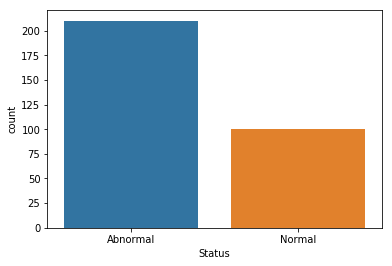

In [10]:
sns.countplot(x = 'Status', data = back_data)
plt.show()

In [11]:
## Understanding the structure of the data variables
back_data.info()

##Checking for missing values. There are no missing values
print(back_data.isnull().sum())

## split of the Status column between the two levels Abnormal and Normal
print(back_data.Status.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
pelvic_incidence            310 non-null float64
pelvic tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
pelvic_slope                310 non-null float64
Direct_tilt                 310 non-null float64
thoracic_slope              310 non-null float64
cervical_tilt               310 non-null float64
sacrum_angle                310 non-null float64
scoliosis_slope             310 non-null float64
Status                      310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB
pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope             

In [12]:
back_data.head()

pelvic_incidence  pelvic tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027818    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
0      98.672917                 -0.254400      0.744503      12.5661   
1     114.405425                  4.564259      0.415186      12.8874   
2     105.985135                 -3.530317      0.474889      26.8343   
3     101.868495                 11.211523      0.369345      23.5603   
4     108.168725                  7.918501      0.543360      35.4940   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope    Status  
0         14.5386       15.30468    -28.658501          43.5123  Abnormal  
1         17.5323       16.78486    -25.530607          16.1102  Abnormal  
2         17.4861       16.65897    -29.031888          19.2221  Abnormal  
3         12.7074       11.42447    -30.470246          18.8329  Abnormal  
4         15.9546        8.87237    -16.378376          24.9171  Abnormal

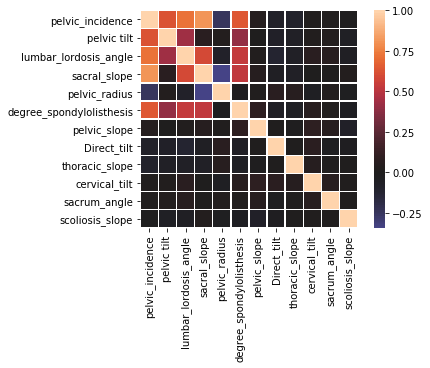

In [13]:
corr_back = back_data.corr()

# Generate the correlation plot 
sns.heatmap(corr_back, center=0, square=True, linewidths=.5)

plt.show()

In [14]:
# Seeing the correlation values
corr_back

pelvic_incidence  pelvic tilt  \
pelvic_incidence                  1.000000     0.629199   
pelvic tilt                       0.629199     1.000000   
lumbar_lordosis_angle             0.717282     0.432764   
sacral_slope                      0.814960     0.062345   
pelvic_radius                    -0.247467     0.032668   
degree_spondylolisthesis          0.638743     0.397862   
pelvic_slope                      0.043290     0.008852   
Direct_tilt                      -0.078411    -0.072119   
thoracic_slope                   -0.089740    -0.063394   
cervical_tilt                     0.016750     0.028931   
sacrum_angle                      0.019240     0.032859   
scoliosis_slope                  -0.007251    -0.056550   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.717282      0.814960      -0.247467   
pelvic tilt                            0.432764      0.062345       0.032668   
lumbar_lordosis_angle                  1.000000      0.598387      -0.080344   
sacral_slope                           0.598387      1.000000      -0.342128   
pelvic_radius                         -0.080344     -0.342128       1.000000   
degree_spondylolisthesis               0.533667      0.523557      -0.026065   
pelvic_slope                           0.029486      0.048988       0.015767   
Direct_tilt                           -0.112939     -0.046914       0.063433   
thoracic_slope                        -0.063582     -0.067968       0.060477   
cervical_tilt                          0.063875     -0.000063      -0.039800   
sacrum_angle                           0.057199      0.000207       0.029738   
scoliosis_slope                       -0.049054      0.032853      -0.030145   

                          degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
pelvic_incidence                          0.638743      0.043290    -0.078411   
pelvic tilt                               0.397862      0.008852    -0.072119   
lumbar_lordosis_angle                     0.533667      0.029486    -0.112939   
sacral_slope                              0.523557      0.048988    -0.046914   
pelvic_radius                            -0.026065      0.015767     0.063433   
degree_spondylolisthesis                  1.000000      0.085925    -0.063812   
pelvic_slope                              0.085925      1.000000     0.012694   
Direct_tilt                              -0.063812      0.012694     1.000000   
thoracic_slope                           -0.057286     -0.011770     0.009887   
cervical_tilt                             0.056576      0.088017     0.072738   
sacrum_angle                              0.023021      0.060743    -0.037428   
scoliosis_slope                          -0.041023     -0.073893    -0.024021   

                          thoracic_slope  cervical_tilt  sacrum_angle  \
pelvic_incidence               -0.089740       0.016750      0.019240   
pelvic tilt                    -0.063394       0.028931      0.032859   
lumbar_lordosis_angle          -0.063582       0.063875      0.057199   
sacral_slope                   -0.067968      -0.000063      0.000207   
pelvic_radius                   0.060477      -0.039800      0.029738   
degree_spondylolisthesis       -0.057286       0.056576      0.023021   
pelvic_slope                   -0.011770       0.088017      0.060743   
Direct_tilt                     0.009887       0.072738     -0.037428   
thoracic_slope                  1.000000       0.052451      0.011354   
cervical_tilt                   0.052451       1.000000      0.057451   
sacrum_angle                    0.011354       0.057451      1.000000   
scoliosis_slope                 0.009541       0.021243      0.015337   

                          scoliosis_slope  
pelvic_incidence                -0.007251  
pelvic tilt                     -0.056550  
lumbar_lordosis_angle           -0.049054  
sacral_slope                     0.03

In [15]:
back_data.groupby('Status').mean()

pelvic_incidence  pelvic tilt  lumbar_lordosis_angle  sacral_slope  \
Status                                                                         
Abnormal         64.692562    19.791111              55.925370      44.90145   
Normal           51.685244    12.821414              43.542605      38.86383   

          pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
Status                                                                         
Abnormal     115.077713                 37.777705      0.483979    21.085875   
Normal       123.890834                  2.186572      0.449880    21.816394   

          thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
Status                                                                  
Abnormal       12.948913      12.132737    -13.826677        25.146915  
Normal         13.307268      11.514534    -14.528711        26.694019

In [16]:
back_data.groupby('Status').median()

pelvic_incidence  pelvic tilt  lumbar_lordosis_angle  sacral_slope  \
Status                                                                         
Abnormal         65.274888    18.798899              56.150000     44.639597   
Normal           50.123115    13.482435              42.638923     37.059694   

          pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
Status                                                                         
Abnormal     115.650323                 31.946516      0.501280      21.7506   
Normal       123.874328                  1.152710      0.418732      22.4146   

          thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
Status                                                                  
Abnormal        12.77005      11.973735    -14.892070         24.50940  
Normal          13.40975      11.330750    -13.974694         27.72795

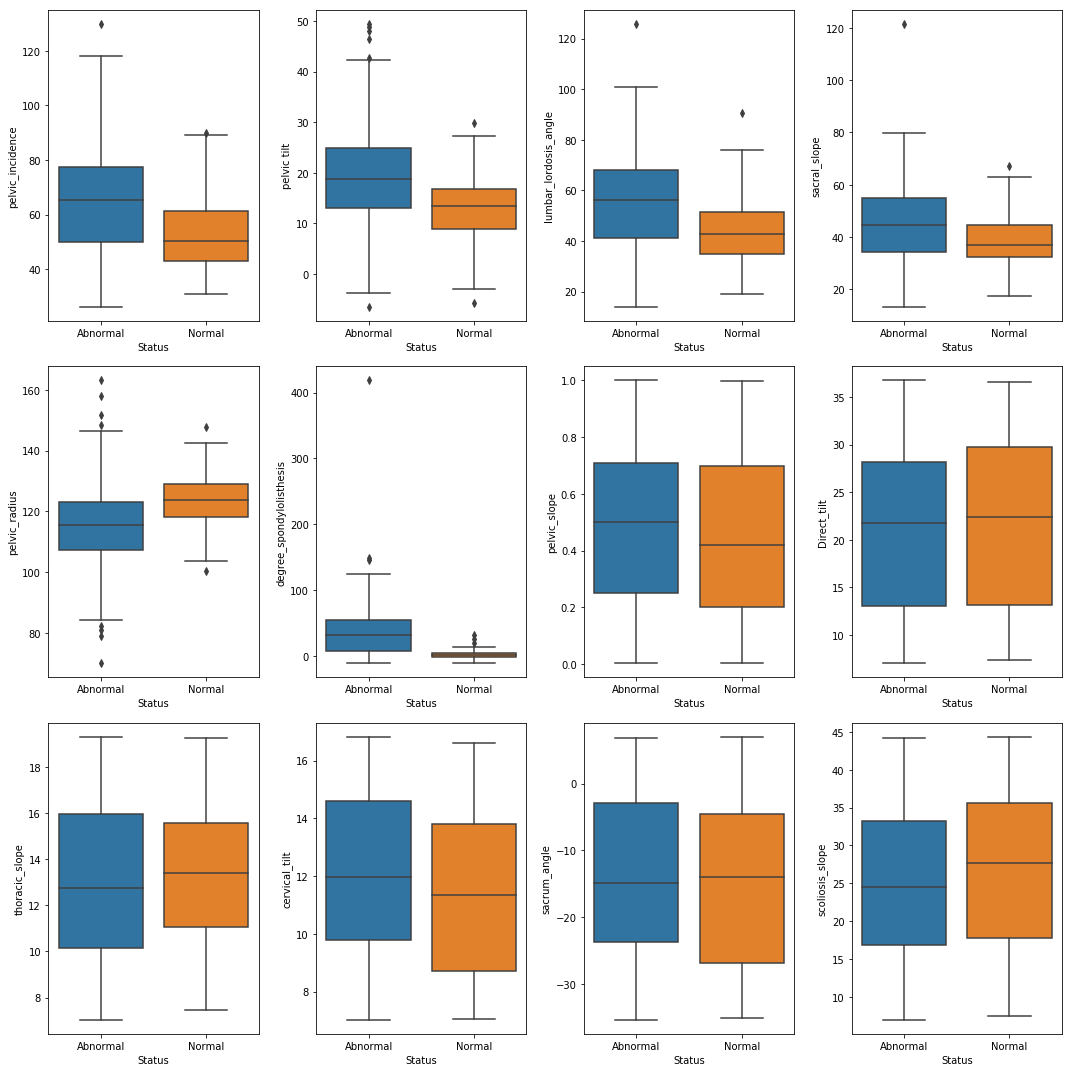

In [17]:
## Generating 3*4 matrix of box plots
fig, axes = plt.subplots(3, 4, figsize = (15,15))
axes = axes.flatten()

for i in range(0,len(back_data.columns)-1):
    sns.boxplot(x="Status", y=back_data.iloc[:,i], data=back_data, orient='v', ax=axes[i])

plt.tight_layout()
plt.show()

In [18]:
back_data.loc[back_data.Status=='Abnormal','Status'] = 1
back_data.loc[back_data.Status=='Normal','Status'] = 0

In [19]:
X = back_data.loc[:, back_data.columns != "Status"]
y = back_data.loc[:, back_data.columns == "Status"]

In [20]:
def data_preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

    scaler.fit(X_train)

    # Now apply the transformations to the data:
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    return(train_scaled, test_scaled, y_train, y_test)

In [21]:
def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x, y)
    return(logreg)

In [22]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

In [23]:
logreg_result = logistic_regression(X_train_scaled, y_train)


In [24]:
print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.871
Test set score: 0.817


In [25]:
# While the previous model implemented was good in predicting the Target variable on a test set, 
# we did not interpret anything about the individual features - which variable(s) influence the Target variable more.

logit_model = sm.Logit(y_train, X_train_scaled)
result = logit_model.fit()
print(result.summary2())

         Current function value: 0.473055
         Iterations: 35
                           Results: Logit
Model:                Logit              No. Iterations:     35.0000 
Dependent Variable:   y                  Pseudo R-squared:   0.248   
Date:                 2020-11-24 23:07   AIC:                229.3058
No. Observations:     217                BIC:                269.8646
Df Model:             11                 Log-Likelihood:     -102.65 
Df Residuals:         205                LL-Null:            -136.45 
Converged:            0.0000             Scale:              1.0000  
---------------------------------------------------------------------
     Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------
x1   0.0814 11482676.3676  0.0000 1.0000 -22505632.0452 22505632.2080
x2   0.0765  6545064.3181  0.0000 1.0000 -12828090.2634 12828090.4165
x3  -0.2797        0.3142 -0.8904 0.3733        -0.8

C:\Users\gkumar2\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## Understanding the model result summary

 - The above model did not converge because some variables were highly correlated with each other and this would have led to the correlation/ covariance matrix to be singular. 
 - A matrix can become singular if any rows(columns) can be expressed as a linear combination of any other rows (columns). 
 - In fact, it was very intersting to note that in our data, the Pelvic Incidence column values are an exact sum of Pelvic Tilt and Sacral Slope. So that explains.
 - Also in our statistical test results, the Standard error values are very high and p-value is 1 for these three variables. Hence we will remove them and re run the model. 

In [26]:
#Removing the highly correlated variables which also had high standard error
cols_to_include = [cols for cols in X.columns if cols not in ['pelvic_incidence', 'pelvic tilt','sacral_slope']]
X = back_data[cols_to_include]

In [27]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.848
Test set score: 0.742


The test results indicate that the predictive power has gone down after removing the highly correlated variables. Let us look at the statistical summary below.

In [28]:
# to get the statistical summary of the new model
logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.481933
         Iterations 7
                        Results: Logit
Model:              Logit            No. Iterations:   7.0000  
Dependent Variable: y                Pseudo R-squared: 0.234   
Date:               2020-11-25 08:14 AIC:              227.1591
No. Observations:   217              BIC:              257.5781
Df Model:           8                Log-Likelihood:   -104.58 
Df Residuals:       208              LL-Null:          -136.45 
Converged:          1.0000           Scale:            1.0000  
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
x1      -0.5434     0.2568   -2.1158   0.0344   -1.0468   -0.0400
x2      -0.9642     0.2080   -4.6364   0.0000   -1.3719   -0.5566
x3       2.2963     0.4142    5.5443   0.0000    1.4846    3.1081
x4       0.1499

In [29]:
# considering only the variables which have p-value less than 0.05
X_trim_1 = X.loc[:,['lumbar_lordosis_angle','pelvic_radius','degree_spondylolisthesis']]

In [30]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X_trim_1,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.848
Test set score: 0.774


In [31]:
logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.498420
         Iterations 7
                        Results: Logit
Model:              Logit            No. Iterations:   7.0000  
Dependent Variable: y                Pseudo R-squared: 0.207   
Date:               2020-11-25 08:14 AIC:              222.3145
No. Observations:   217              BIC:              232.4542
Df Model:           2                Log-Likelihood:   -108.16 
Df Residuals:       214              LL-Null:          -136.45 
Converged:          1.0000           Scale:            1.0000  
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
x1      -0.4688     0.2426   -1.9325   0.0533   -0.9443    0.0067
x2      -0.9188     0.2037   -4.5100   0.0000   -1.3181   -0.5195
x3       2.1897     0.3937    5.5626   0.0000    1.4182    2.9613



In [32]:
# assigning the model predicted values to y_pred
y_pred = logreg_result.predict(X_test_scaled)

# assigning the string Normal and Abnormal to the 0 and 1 values respectively. This is useful in plotting 
# the confusion matrix
y_pred_string = y_pred.astype(str)
y_pred_string[np.where(y_pred_string == '0')] = 'Normal'
y_pred_string[np.where(y_pred_string == '1')] = 'Abnormal'

y_test_string = y_test.astype(str)
y_test_string[np.where(y_test_string == '0')] = 'Normal'
y_test_string[np.where(y_test_string == '1')] = 'Abnormal'

In [33]:
# Gauging model accuracy

from sklearn.metrics import confusion_matrix
ax= plt.subplot()
labels = ['Abnormal','Normal']
cm = confusion_matrix(y_test_string, y_pred_string, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Abnormal', 'Normal']); ax.yaxis.set_ticklabels(['Abnormal', 'Normal']);
plt.show()